In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv("Crop_recommendation.csv")

In [3]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [6]:
pd.DataFrame(df["label"])

,label
0,rice
1,rice
2,rice
3,rice
4,rice
...,...
2195,coffee
2196,coffee
2197,coffee
2198,coffee


In [7]:
pd.DataFrame(df["label"].value_counts().sort_index())


,label
apple,100
banana,100
blackgram,100
chickpea,100
coconut,100
coffee,100
cotton,100
grapes,100
jute,100
kidneybeans,100


In [8]:
df["label"].value_counts().reset_index(name="count")


,index,count
0,rice,100
1,maize,100
2,jute,100
3,cotton,100
4,coconut,100
5,papaya,100
6,orange,100
7,apple,100
8,muskmelon,100
9,watermelon,100


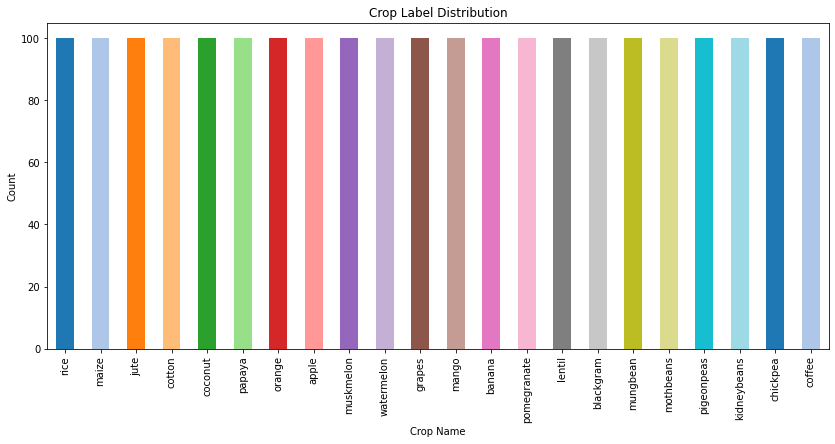

In [9]:
df["label"].value_counts().plot(
    kind="bar",
    figsize=(14,6),
    color=plt.cm.tab20.colors
)

plt.xlabel("Crop Name")
plt.ylabel("Count")
plt.title("Crop Label Distribution")
plt.show()



In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [11]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [12]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [13]:
df["label"]

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [14]:
le = LabelEncoder()
df["label_encoded"] = le.fit_transform(df["label"])

In [15]:
df["label_encoded"]

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label_encoded, Length: 2200, dtype: int32

In [16]:
df["label_encoded"].head()

0    20
1    20
2    20
3    20
4    20
Name: label_encoded, dtype: int32

In [17]:
le.classes_


array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

In [18]:
df["label_encoded"].value_counts()

20    100
11    100
8     100
6     100
4     100
17    100
16    100
0     100
15    100
21    100
7     100
12    100
1     100
19    100
10    100
2     100
14    100
13    100
18    100
9     100
3     100
5     100
Name: label_encoded, dtype: int64

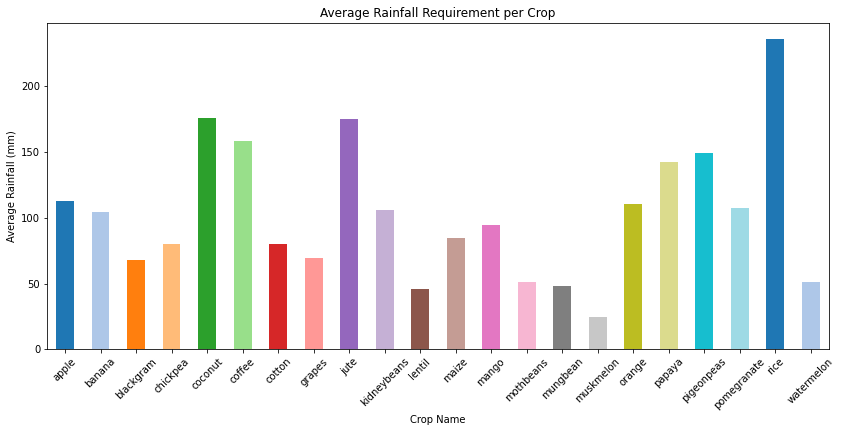

In [19]:
plt.figure(figsize=(14,6))

df.groupby("label")["rainfall"].mean().plot(
    kind="bar",
    color=plt.cm.tab20.colors
)

plt.xlabel("Crop Name")
plt.ylabel("Average Rainfall (mm)")
plt.title("Average Rainfall Requirement per Crop")
plt.xticks(rotation=45)
plt.show()


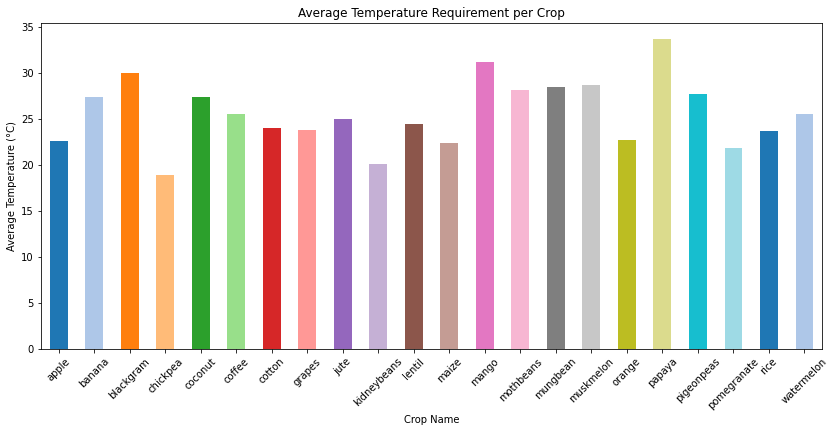

In [20]:
plt.figure(figsize=(14,6))

df.groupby("label")["temperature"].mean().plot(
    kind="bar",
    color=plt.cm.tab20.colors
)

plt.xlabel("Crop Name")
plt.ylabel("Average Temperature (°C)")
plt.title("Average Temperature Requirement per Crop")
plt.xticks(rotation=45)
plt.show()

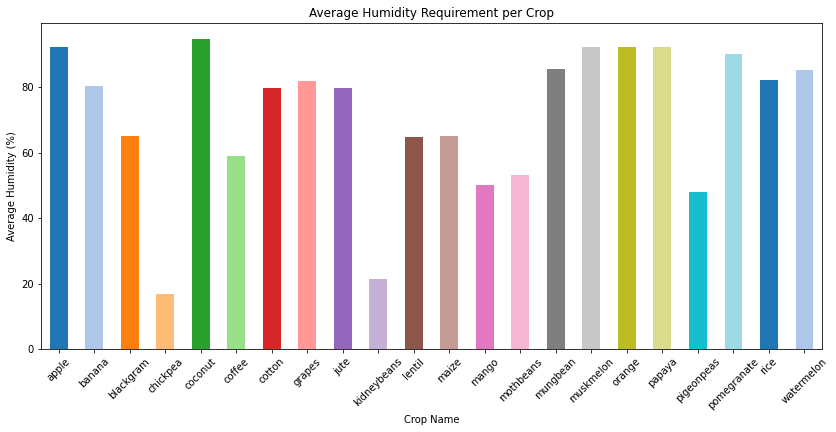

In [21]:
plt.figure(figsize=(14,6))
df.groupby("label")["humidity"].mean().plot(
    kind="bar",
    color=plt.cm.tab20.colors
)
plt.xlabel("Crop Name")
plt.ylabel("Average Humidity (%)")
plt.title("Average Humidity Requirement per Crop")
plt.xticks(rotation=45)
plt.show()


In [22]:
npk_avg = df.groupby("label")[["N", "P", "K"]].mean()


In [23]:
npk_avg

,N,P,K
label,,,
apple,20.80,134.22,199.89
banana,100.23,82.01,50.05
blackgram,40.02,67.47,19.24
chickpea,40.09,67.79,79.92
coconut,21.98,16.93,30.59
coffee,101.20,28.74,29.94
cotton,117.77,46.24,19.56
grapes,23.18,132.53,200.11
jute,78.40,46.86,39.99


<Figure size 1296x504 with 0 Axes>

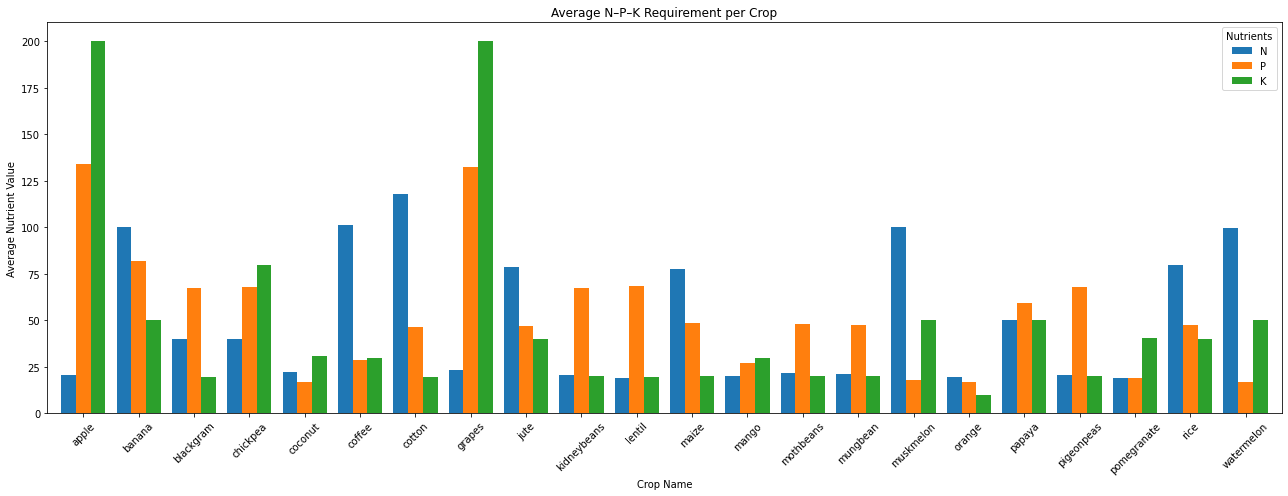

In [24]:
plt.figure(figsize=(18,7))
npk_avg.plot(
    kind="bar",
    figsize=(18,7),
    width=0.8
)
plt.xlabel("Crop Name")
plt.ylabel("Average Nutrient Value")
plt.title("Average N–P–K Requirement per Crop")
plt.xticks(rotation=45)
plt.legend(title="Nutrients")
plt.tight_layout()
plt.show()


In [25]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,label_encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20


In [26]:
climate_avg = df.groupby("label")[["temperature", "humidity", "rainfall", "ph"]].mean()


In [27]:
climate_avg

,temperature,humidity,rainfall,ph
label,,,,
apple,22.630942,92.333383,112.654779,5.929663
banana,27.376798,80.358123,104.626980,5.983893
blackgram,29.973340,65.118426,67.884151,7.133952
chickpea,18.872847,16.860439,80.058977,7.336957
coconut,27.409892,94.844272,175.686646,5.976562
coffee,25.540477,58.869846,158.066295,6.790308
cotton,23.988958,79.843474,80.398043,6.912675
grapes,23.849575,81.875228,69.611829,6.025937
jute,24.958376,79.639864,174.792798,6.732778


<Figure size 1296x504 with 0 Axes>

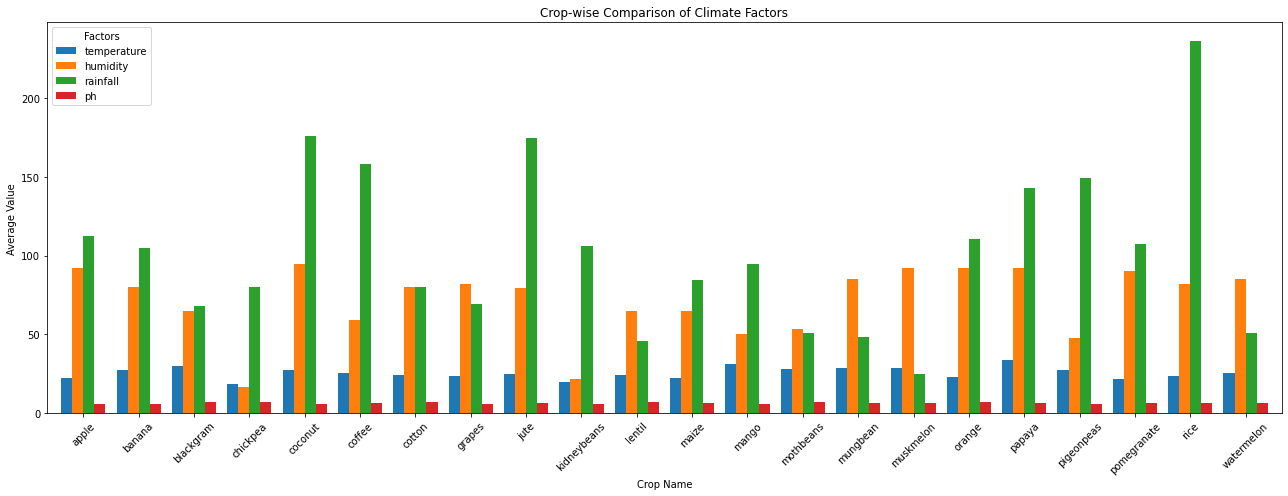

In [28]:
plt.figure(figsize=(18,7))

climate_avg.plot(
    kind="bar",
    figsize=(18,7),
    width=0.8
   
)

plt.xlabel("Crop Name")
plt.ylabel("Average Value")
plt.title("Crop-wise Comparison of Climate Factors")
plt.xticks(rotation=45)
plt.legend(title="Factors")
plt.tight_layout()
plt.show()


In [29]:
df["label_encoded"].value_counts()

20    100
11    100
8     100
6     100
4     100
17    100
16    100
0     100
15    100
21    100
7     100
12    100
1     100
19    100
10    100
2     100
14    100
13    100
18    100
9     100
3     100
5     100
Name: label_encoded, dtype: int64

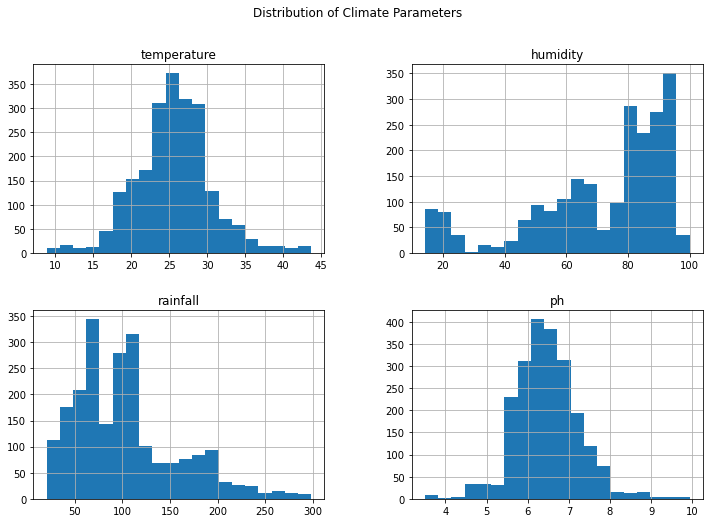

In [30]:
df[["temperature", "humidity", "rainfall", "ph"]].hist(
    figsize=(12,8),
    bins=20
)
plt.suptitle("Distribution of Climate Parameters")
plt.show()


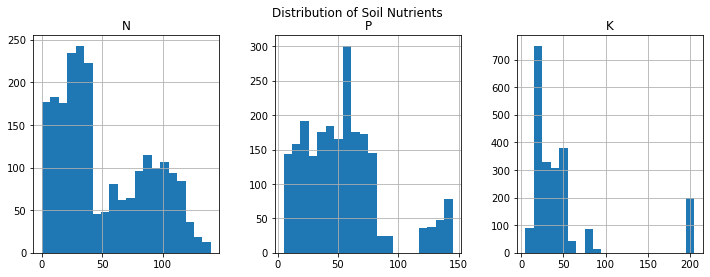

In [31]:
df[["N", "P", "K"]].hist(
    figsize=(12,4),
    bins=20,
    layout=(1,3)
)

plt.suptitle("Distribution of Soil Nutrients")
plt.show()


In [32]:
df["ph_category"] = pd.cut(
    df["ph"],
    bins=[0, 5.5, 7.5, 14],
    labels=["Acidic", "Neutral", "Alkaline"]
)


In [33]:
pd.crosstab(df["label"], df["ph_category"])


ph_category,Acidic,Neutral,Alkaline
label,,,
apple,0,100,0
banana,0,100,0
blackgram,0,80,20
chickpea,0,56,44
coconut,0,100,0
coffee,0,100,0
cotton,0,79,21
grapes,0,100,0
jute,0,100,0


In [34]:
df["rainfall_category"] = pd.cut(
    df["rainfall"],
    bins=[0, 100, 200, 300],
    labels=["Low", "Medium", "High"]
)

pd.crosstab(df["label"], df["rainfall_category"])


rainfall_category,Low,Medium,High
label,,,
apple,0,100,0
banana,38,62,0
blackgram,100,0,0
chickpea,100,0,0
coconut,0,74,26
coffee,0,100,0
cotton,100,0,0
grapes,100,0,0
jute,0,100,0


In [35]:
df.corr()

,N,P,K,temperature,humidity,ph,rainfall,label_encoded
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,-0.031130
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,-0.491006
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,-0.346417
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,0.113606
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,0.193911
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,-0.012253
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,0.045611
label_encoded,-0.031130,-0.491006,-0.346417,0.113606,0.193911,-0.012253,0.045611,1.000000


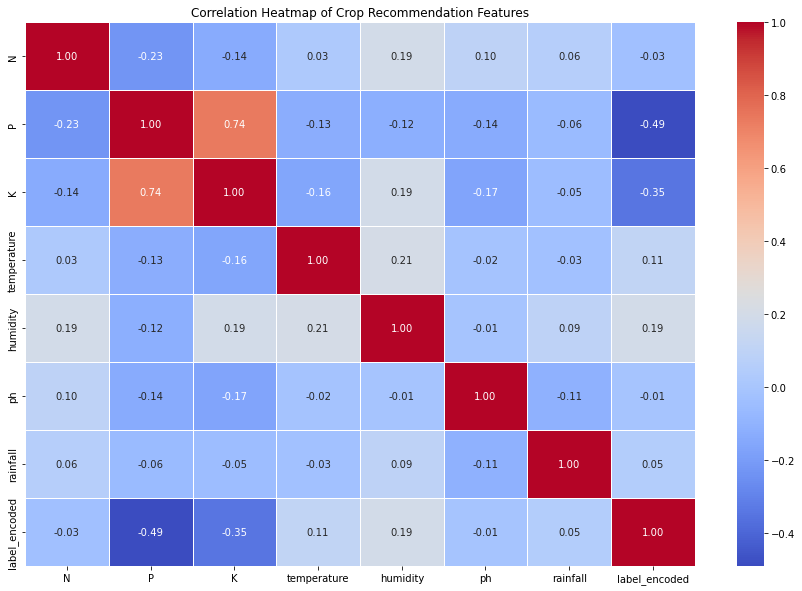

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(15,10))

sns.heatmap(
    corr_matrix,
    annot=True,
    linewidths=0.5,
    fmt=".2f",
    cmap="coolwarm"
)

plt.title("Correlation Heatmap of Crop Recommendation Features")
plt.show()


In [37]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,label_encoded,ph_category,rainfall_category
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20,Neutral,High
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20,Neutral,High
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20,Alkaline,High
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20,Neutral,High
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20,Alkaline,High
...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,5,Neutral,Medium
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,5,Neutral,Medium
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,5,Neutral,Medium
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,5,Neutral,Medium


In [38]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   N                  2200 non-null   int64   
 1   P                  2200 non-null   int64   
 2   K                  2200 non-null   int64   
 3   temperature        2200 non-null   float64 
 4   humidity           2200 non-null   float64 
 5   ph                 2200 non-null   float64 
 6   rainfall           2200 non-null   float64 
 7   label              2200 non-null   object  
 8   label_encoded      2200 non-null   int32   
 9   ph_category        2200 non-null   category
 10  rainfall_category  2200 non-null   category
dtypes: category(2), float64(4), int32(1), int64(3), object(1)
memory usage: 150.8+ KB


In [40]:
df.drop(
    ["label_encoded", "ph_category", "rainfall_category"],
    axis=1,
    inplace=True
)


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [42]:
X = df.drop("label",axis=1)

In [43]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [44]:
Y = df["label"]

In [45]:
pd.DataFrame(Y)

,label
0,rice
1,rice
2,rice
3,rice
4,rice
...,...
2195,coffee
2196,coffee
2197,coffee
2198,coffee


In [46]:
le = LabelEncoder()

In [47]:
y_endcoded =  le.fit_transform(Y)

In [48]:
y_endcoded

array([20, 20, 20, ...,  5,  5,  5])

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y_endcoded,test_size=0.2, random_state=42, stratify=y_endcoded)

In [50]:
X_train


,N,P,K,temperature,humidity,ph,rainfall
1607,0,18,14,29.771494,92.007200,7.207991,114.416179
1212,9,122,201,29.587484,80.919344,5.570291,68.064173
362,11,71,24,21.140114,22.718235,5.606620,141.605672
566,38,38,18,26.310518,61.187491,6.294130,35.734038
1671,18,12,8,12.590940,91.816688,6.206053,119.391672
...,...,...,...,...,...,...,...
808,13,64,20,19.134577,62.575269,6.590571,36.469470
422,16,55,19,19.543141,47.191883,6.413544,192.437219
2052,82,48,36,25.793520,81.769040,6.352077,193.241838
2083,90,50,44,26.916437,73.486560,6.253409,171.471638


In [51]:
X_test

,N,P,K,temperature,humidity,ph,rainfall
1609,13,23,6,23.961476,90.264080,7.365338,102.695870
1072,98,79,50,25.341198,84.473213,6.435917,91.064934
1912,140,38,15,24.147295,75.882986,6.021440,69.915635
100,71,54,16,22.613600,63.690706,5.749914,87.759539
1645,40,22,6,24.536101,91.909972,6.488221,115.978799
...,...,...,...,...,...,...,...
140,99,56,17,24.108592,73.131123,6.234330,71.075622
1587,1,135,203,22.778565,92.701240,5.624203,113.775922
2015,70,38,35,24.397362,79.268617,7.014064,164.269701
1254,21,134,202,10.723025,80.021306,6.425420,65.298211


In [52]:
y_train

array([16,  7,  9, ...,  8,  8,  7])

In [53]:
y_test

array([16,  1,  6, 11, 16,  3, 20,  2,  1, 16, 21, 19, 21, 11, 13,  7,  7,
       12, 12,  0,  2,  0, 13,  9,  0,  8, 13, 21, 20,  5, 12,  8,  1,  5,
        8,  2,  7,  7,  2,  8,  4, 17, 12, 11, 10,  8,  6, 10,  3, 14, 17,
       19, 18, 21, 12,  2, 17, 17,  5, 10, 10, 13,  5,  1, 17, 20, 16,  4,
        2, 19,  1, 15, 21, 10,  1,  4, 13, 14, 14, 12,  5, 21, 15,  9, 12,
       19, 16,  6,  4, 17, 13, 14, 13,  6,  8,  7,  6,  3,  8, 21, 15, 19,
       16, 18, 18,  7,  9, 10, 20, 20,  0, 14, 14,  7, 20, 15,  2, 10,  1,
       16, 16,  3, 11, 12, 11, 10,  1, 19,  4, 14,  6,  3,  8, 14, 13, 11,
        0,  3, 20, 11,  6,  8, 19, 12, 20, 17,  1, 16, 18, 10, 11,  3,  6,
       21, 13, 11, 18, 15,  0, 14,  2,  3, 11, 11,  9,  5, 16, 11,  7, 19,
        0,  4, 15,  7,  6, 10, 18,  3,  2, 13,  0, 15,  6, 21, 15, 21, 16,
       21,  5,  9,  0,  3,  2,  5, 15,  5,  0,  7,  8, 17,  4,  7, 21, 14,
       19, 18, 14, 10, 17, 15,  3,  0, 11,  3,  1, 19, 19, 11, 16,  8,  6,
        6, 11,  7, 14, 10

In [54]:
len(y_train)

1760

In [55]:
len(y_test)

440

In [56]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(kernel="rbf"),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB()
}


In [57]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models.
    X_train: training data (no labels).
    X_test: testing data (no labels).
    y_train: training labels.
    y_test: test labels.
    """
    np.random.seed(42)
    model_score ={}
    
    
    for name,model in models.items():

        model.fit(X_train,y_train)
        
        model_score[name] = model.score(X_test,y_test)
    return model_score

In [58]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                             X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)

C:\Users\himan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
model_scores

{'Logistic Regression': 0.95,
 'KNN': 0.9772727272727273,
 'SVM': 0.9840909090909091,
 'Decision Tree': 0.9795454545454545,
 'Random Forest': 0.9954545454545455,
 'Gradient Boosting': 0.9886363636363636,
 'Naive Bayes': 0.9954545454545455}

In [60]:
model_compare = pd.DataFrame(model_scores,index=["Accuracy"])
model_compare

,Logistic Regression,KNN,SVM,Decision Tree,Random Forest,Gradient Boosting,Naive Bayes
Accuracy,0.95,0.977273,0.984091,0.979545,0.995455,0.988636,0.995455


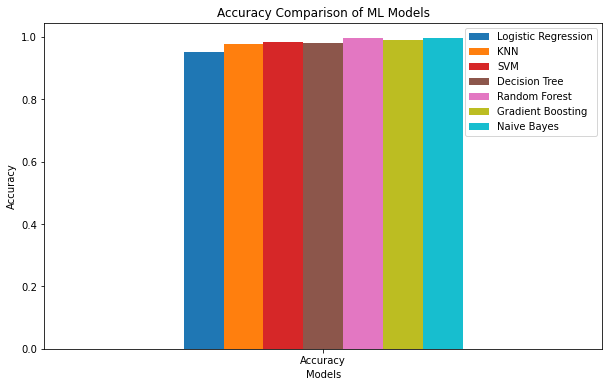

In [61]:
model_compare.plot.bar(
    figsize=(10,6),
    colormap="tab10",
    width=0.5
)

plt.title("Accuracy Comparison of ML Models")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=0)
plt.show()


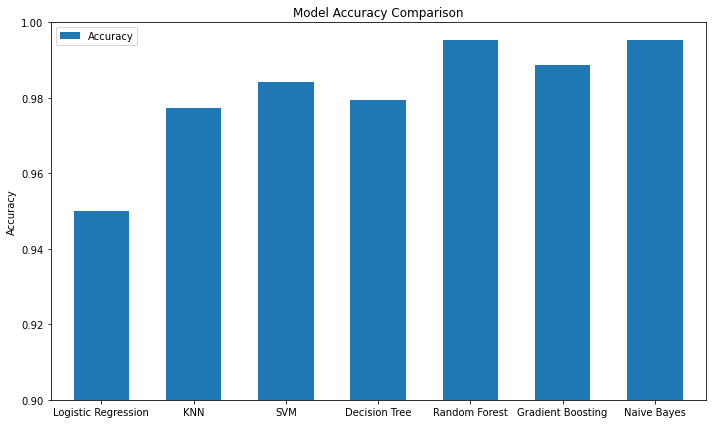

In [62]:
model_compare.T.plot.bar(
    figsize=(10,6),
    width=0.6,
    colormap="tab10"
)

plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=0)
plt.ylim(0.9, 1.0)
plt.tight_layout()
plt.show()


In [63]:
final_model = RandomForestClassifier(
    n_estimators=200,    
    random_state=42
)

final_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [64]:
final_accuracy = final_model.score(X_test, y_test)
print("Final Random Forest Accuracy:", final_accuracy)


Final Random Forest Accuracy: 0.9954545454545455


In [65]:
# Cross-validated accuracy
cv_acc = cross_val_score(final_model,
                        X,
                        Y,
                        cv=5,
                        scoring="accuracy")

cv_acc

array([0.99772727, 0.99318182, 0.99545455, 0.99545455, 0.99090909])

In [66]:
cv_acc = cross_val_score(final_model, X, y_endcoded, cv=5, scoring="accuracy")


In [67]:
cv_precision = cross_val_score(final_model, X, y_endcoded, cv=5, scoring="precision_macro")

In [68]:
cv_recall = cross_val_score(final_model, X, y_endcoded, cv=5, scoring="recall_macro")

In [69]:

cv_f1 = cross_val_score(final_model, X, y_endcoded, cv=5, scoring="f1_macro")

In [70]:
cv_metrics = pd.DataFrame({
    "Accuracy": [cv_acc.mean()],
    "Precision": [cv_precision.mean()],
    "Recall": [cv_recall.mean()],
    "F1 Score": [cv_f1.mean()]
})


In [71]:
cv_metrics

,Accuracy,Precision,Recall,F1 Score
0,0.994545,0.994923,0.994545,0.994537


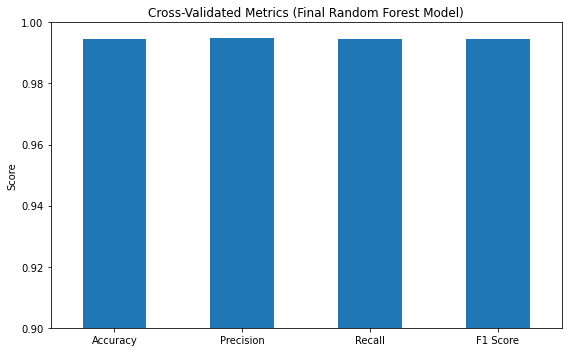

In [72]:
cv_metrics.T.plot.bar(
    figsize=(8,5),
    legend=False,
    colormap="tab10"
)

plt.title("Cross-Validated Metrics (Final Random Forest Model)")
plt.ylabel("Score")
plt.ylim(0.9, 1.0)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [73]:
def predict_crop_rf(N, P, K, temperature, humidity, ph, rainfall):
    input_df = pd.DataFrame([{
        "N": N,
        "P": P,
        "K": K,
        "temperature": temperature,
        "humidity": humidity,
        "ph": ph,
        "rainfall": rainfall
    }])

    probs = final_model.predict_proba(input_df)[0]
    idx = np.argmax(probs)

    crop = le.inverse_transform([idx])[0]
    confidence = probs[idx] * 100

    return crop, round(confidence, 2)


In [74]:
predict_crop_rf(
    N=90,
    P=42,
    K=43,
    temperature=20.8,
    humidity=82.0,
    ph=6.5,
    rainfall=202.9
)


('rice', 93.5)

In [75]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [76]:
predict_crop_rf(
    N=104,
    P=18,
    K=30,
    temperature=23.6,
    humidity=60.39,
    ph=6.7,
    rainfall=140.9
)


('coffee', 99.5)

## ANN Model

In [78]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

In [79]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [80]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [81]:
Y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [82]:
y_endcoded

array([20, 20, 20, ...,  5,  5,  5])

In [83]:
len(y_endcoded)

2200

In [84]:
for i, crop in enumerate(le.classes_):
    print(i, "->", crop)


0 -> apple
1 -> banana
2 -> blackgram
3 -> chickpea
4 -> coconut
5 -> coffee
6 -> cotton
7 -> grapes
8 -> jute
9 -> kidneybeans
10 -> lentil
11 -> maize
12 -> mango
13 -> mothbeans
14 -> mungbean
15 -> muskmelon
16 -> orange
17 -> papaya
18 -> pigeonpeas
19 -> pomegranate
20 -> rice
21 -> watermelon


In [85]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_endcoded,
    test_size=0.2,
    random_state=42,
    stratify=y_endcoded
)


In [86]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [87]:
ann_model = Sequential([
    Dense(128, activation="relu", input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),

    Dense(64, activation="relu"),
    Dropout(0.2),

    Dense(len(le.classes_), activation="softmax")
])


In [88]:
ann_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

ann_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 22)                1430      
                                                                 
Total params: 10,710
Trainable params: 10,710
Non-trainable params: 0
_________________________________________________________________


In [89]:
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

history = ann_model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
44/44 [==============================] - 1s 8ms/step - loss: 2.7765 - accuracy: 0.2287 - val_loss: 2.2833 - val_accuracy: 0.4460
Epoch 2/100
44/44 [==============================] - 0s 3ms/step - loss: 1.9592 - accuracy: 0.4759 - val_loss: 1.4037 - val_accuracy: 0.7074
Epoch 3/100
44/44 [==============================] - 0s 3ms/step - loss: 1.2881 - accuracy: 0.6357 - val_loss: 0.8491 - val_accuracy: 0.8438
Epoch 4/100
44/44 [==============================] - 0s 3ms/step - loss: 0.9225 - accuracy: 0.7422 - val_loss: 0.5861 - val_accuracy: 0.8636
Epoch 5/100
44/44 [==============================] - 0s 4ms/step - loss: 0.7209 - accuracy: 0.7734 - val_loss: 0.4457 - val_accuracy: 0.8977
Epoch 6/100
44/44 [==============================] - 0s 3ms/step - loss: 0.6007 - accuracy: 0.8011 - val_loss: 0.3480 - val_accuracy: 0.9432
Epoch 7/100
44/44 [==============================] - 0s 3ms/step - loss: 0.5200 - accuracy: 0.8374 - val_loss: 0.2874 - val_accuracy: 0.9489
Epoch 8/100
4

Epoch 59/100
44/44 [==============================] - 0s 3ms/step - loss: 0.0910 - accuracy: 0.9688 - val_loss: 0.0608 - val_accuracy: 0.9744
Epoch 60/100
44/44 [==============================] - 0s 3ms/step - loss: 0.0971 - accuracy: 0.9652 - val_loss: 0.0567 - val_accuracy: 0.9773
Epoch 61/100
44/44 [==============================] - 0s 3ms/step - loss: 0.0920 - accuracy: 0.9645 - val_loss: 0.0671 - val_accuracy: 0.9688
Epoch 62/100
44/44 [==============================] - 0s 3ms/step - loss: 0.0974 - accuracy: 0.9673 - val_loss: 0.0629 - val_accuracy: 0.9659
Epoch 63/100
44/44 [==============================] - 0s 3ms/step - loss: 0.0917 - accuracy: 0.9638 - val_loss: 0.0618 - val_accuracy: 0.9773
Epoch 64/100
44/44 [==============================] - 0s 3ms/step - loss: 0.0923 - accuracy: 0.9673 - val_loss: 0.0528 - val_accuracy: 0.9830
Epoch 65/100
44/44 [==============================] - 0s 3ms/step - loss: 0.0928 - accuracy: 0.9645 - val_loss: 0.0602 - val_accuracy: 0.9716
Epoch 

In [90]:
loss, accuracy = ann_model.evaluate(X_test_scaled, y_test)
print("ANN Test Accuracy:", accuracy)


14/14 [==============================] - 0s 2ms/step - loss: 0.0279 - accuracy: 0.9909
ANN Test Accuracy: 0.9909090995788574


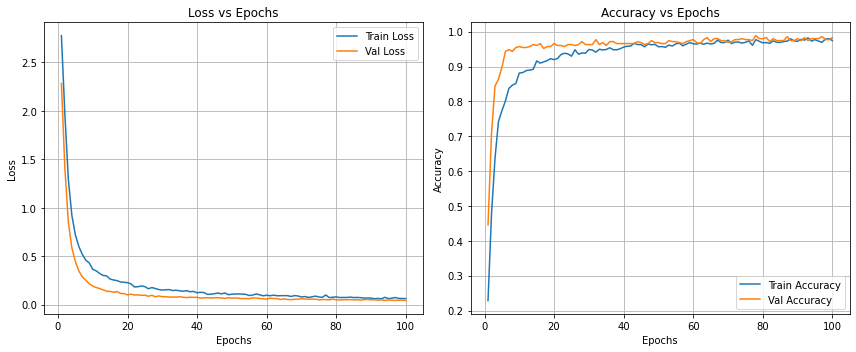

In [91]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history["loss"]) + 1)

plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(epochs, history.history["loss"], label="Train Loss")
plt.plot(epochs, history.history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(epochs, history.history["accuracy"], label="Train Accuracy")
plt.plot(epochs, history.history["val_accuracy"], label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [92]:
def predict_crop_ann(N, P, K, temperature, humidity, ph, rainfall):
    input_df = pd.DataFrame([{
        "N": N,
        "P": P,
        "K": K,
        "temperature": temperature,
        "humidity": humidity,
        "ph": ph,
        "rainfall": rainfall
    }])

    input_scaled = scaler.transform(input_df)
    probs = ann_model.predict(input_scaled, verbose=0)[0]
    idx = np.argmax(probs)
    
    crop = le.inverse_transform([idx])[0]
    confidence = probs[idx] * 100

    return crop, round(confidence, 2)


In [93]:
predict_crop_ann(
    N=90,
    P=42,
    K=43,
    temperature=20.8,
    humidity=82.0,
    ph=6.5,
    rainfall=202.9
)


('rice', 86.64)

In [94]:
predict_crop_ann(
    N=60,
    P=55,
    K=35,
    temperature=25.0,
    humidity=60.0,
    ph=6.8,
    rainfall=110.0
)


('maize', 46.83)

In [95]:
test_samples = [
   
    [90, 45, 40, 21.0, 85.0, 6.5, 220.0],

    [60, 55, 35, 26.0, 65.0, 6.8, 120.0],

    [25, 40, 20, 18.0, 50.0, 5.8, 80.0],

    [70, 50, 55, 28.0, 60.0, 6.7, 140.0],

    [110, 80, 60, 29.5, 80.0, 7.0, 250.0],

    [100, 60, 45, 23.0, 70.0, 6.2, 160.0],

    [85, 40, 40, 24.0, 88.0, 6.4, 260.0],

    [50, 35, 55, 27.0, 68.0, 6.5, 130.0],

    [30, 40, 20, 19.0, 52.0, 5.9, 90.0],

    [45, 35, 40, 32.0, 45.0, 6.6, 70.0]
]


In [96]:
results = []

for s in test_samples:
    rf_crop, rf_conf = predict_crop_rf(*s)
    ann_crop, ann_conf = predict_crop_ann(*s)

    results.append({
        "N": s[0],
        "P": s[1],
        "K": s[2],
        "Temp": s[3],
        "Humidity": s[4],
        "pH": s[5],
        "Rainfall": s[6],
        "RF Prediction": rf_crop,
        "RF Confidence (%)": rf_conf,
        "ANN Prediction": ann_crop,
        "ANN Confidence (%)": ann_conf
    })

comparison_df = pd.DataFrame(results)
comparison_df


,N,P,K,Temp,Humidity,pH,Rainfall,RF Prediction,RF Confidence (%),ANN Prediction,ANN Confidence (%)
0,90,45,40,21.0,85.0,6.5,220.0,rice,91.5,rice,96.07
1,60,55,35,26.0,65.0,6.8,120.0,coffee,50.0,jute,42.75
2,25,40,20,18.0,50.0,5.8,80.0,mothbeans,48.0,maize,50.28
3,70,50,55,28.0,60.0,6.7,140.0,coffee,33.5,coffee,83.26
4,110,80,60,29.5,80.0,7.0,250.0,banana,62.0,rice,64.91
5,100,60,45,23.0,70.0,6.2,160.0,jute,41.0,jute,87.74
6,85,40,40,24.0,88.0,6.4,260.0,rice,69.0,rice,99.12
7,50,35,55,27.0,68.0,6.5,130.0,mango,30.0,mango,57.15
8,30,40,20,19.0,52.0,5.9,90.0,pigeonpeas,38.0,maize,63.68
9,45,35,40,32.0,45.0,6.6,70.0,mango,44.5,mothbeans,60.72


In [97]:
sample_df = df.sample(10, random_state=42)

results = []

for _, row in sample_df.iterrows():
    rf_crop, rf_conf = predict_crop_rf(
        row.N, row.P, row.K,
        row.temperature, row.humidity, row.ph, row.rainfall
    )

    ann_crop, ann_conf = predict_crop_ann(
        row.N, row.P, row.K,
        row.temperature, row.humidity, row.ph, row.rainfall
    )

    results.append({
        "Actual Crop": row.label,
        "RF Prediction": rf_crop,
        "RF Confidence (%)": rf_conf,
        "ANN Prediction": ann_crop,
        "ANN Confidence (%)": ann_conf
    })

pd.DataFrame(results)


,Actual Crop,RF Prediction,RF Confidence (%),ANN Prediction,ANN Confidence (%)
0,muskmelon,muskmelon,100.0,muskmelon,99.98
1,watermelon,watermelon,100.0,watermelon,99.82
2,papaya,papaya,100.0,papaya,100.00
3,papaya,papaya,100.0,papaya,100.00
4,apple,apple,100.0,apple,100.00
5,mango,mango,100.0,mango,99.97
6,apple,apple,99.0,apple,100.00
7,mothbeans,mothbeans,74.0,mothbeans,99.88
8,mungbean,mungbean,99.5,mungbean,100.00
9,lentil,lentil,100.0,lentil,99.96


In [98]:
sample_df

,N,P,K,temperature,humidity,ph,rainfall,label
1451,101,17,47,29.494014,94.729813,6.185053,26.308209,muskmelon
1334,98,8,51,26.179346,86.522581,6.259336,49.430510,watermelon
1761,59,62,49,43.360515,93.351916,6.941497,114.778071,papaya
1735,44,60,55,34.280461,90.555616,6.825371,98.540477,papaya
1576,30,137,200,22.914300,90.704756,5.603413,118.604465,apple
1110,18,19,27,27.755187,52.346058,4.772386,94.112133,mango
1594,35,145,195,22.039115,94.580758,6.231950,110.980401,apple
530,22,44,24,24.309351,56.329383,6.030447,58.995363,mothbeans
651,11,46,24,27.652802,89.806506,6.459252,56.525580,mungbean
819,3,78,18,20.213682,68.652577,6.887130,50.897330,lentil


In [99]:
X_test

,N,P,K,temperature,humidity,ph,rainfall
1609,13,23,6,23.961476,90.264080,7.365338,102.695870
1072,98,79,50,25.341198,84.473213,6.435917,91.064934
1912,140,38,15,24.147295,75.882986,6.021440,69.915635
100,71,54,16,22.613600,63.690706,5.749914,87.759539
1645,40,22,6,24.536101,91.909972,6.488221,115.978799
...,...,...,...,...,...,...,...
140,99,56,17,24.108592,73.131123,6.234330,71.075622
1587,1,135,203,22.778565,92.701240,5.624203,113.775922
2015,70,38,35,24.397362,79.268617,7.014064,164.269701
1254,21,134,202,10.723025,80.021306,6.425420,65.298211


In [100]:

sample_df = X_test.copy()

sample_df["Actual Crop"] = le.inverse_transform(y_test)


In [101]:
sample_df

,N,P,K,temperature,humidity,ph,rainfall,Actual Crop
1609,13,23,6,23.961476,90.264080,7.365338,102.695870,orange
1072,98,79,50,25.341198,84.473213,6.435917,91.064934,banana
1912,140,38,15,24.147295,75.882986,6.021440,69.915635,cotton
100,71,54,16,22.613600,63.690706,5.749914,87.759539,maize
1645,40,22,6,24.536101,91.909972,6.488221,115.978799,orange
...,...,...,...,...,...,...,...,...
140,99,56,17,24.108592,73.131123,6.234330,71.075622,maize
1587,1,135,203,22.778565,92.701240,5.624203,113.775922,apple
2015,70,38,35,24.397362,79.268617,7.014064,164.269701,jute
1254,21,134,202,10.723025,80.021306,6.425420,65.298211,grapes


In [102]:
results = []

for _, row in sample_df.iterrows():
    rf_crop, rf_conf = predict_crop_rf(
        row.N, row.P, row.K,
        row.temperature, row.humidity, row.ph, row.rainfall
    )

    ann_crop, ann_conf = predict_crop_ann(
        row.N, row.P, row.K,
        row.temperature, row.humidity, row.ph, row.rainfall
    )

    results.append({
        "Actual Crop": row["Actual Crop"],
        "RF Prediction": rf_crop,
        "RF Confidence (%)": rf_conf,
        "ANN Prediction": ann_crop,
        "ANN Confidence (%)": ann_conf
    })

comparison_df = pd.DataFrame(results)
comparison_df


,Actual Crop,RF Prediction,RF Confidence (%),ANN Prediction,ANN Confidence (%)
0,orange,orange,97.5,orange,100.00
1,banana,banana,93.5,banana,99.98
2,cotton,cotton,98.5,cotton,99.96
3,maize,maize,99.5,maize,100.00
4,orange,orange,97.5,orange,100.00
...,...,...,...,...,...
435,maize,maize,85.0,maize,58.59
436,apple,apple,100.0,apple,100.00
437,jute,jute,96.5,jute,95.11
438,grapes,grapes,100.0,grapes,100.00


In [103]:
final_model,final_accuracy

(RandomForestClassifier(n_estimators=200, random_state=42), 0.9954545454545455)

In [104]:
ann_model ,accuracy

(<keras.engine.sequential.Sequential at 0x18303643cd0>, 0.9909090995788574)

In [105]:
import joblib

In [106]:
joblib.dump(final_model,"crop_rf_model.pkl")

['crop_rf_model.pkl']

In [108]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
import joblib


In [117]:

from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
import onnx

initial_type = [("float_input", FloatTensorType([None, 7]))]

onnx_model = convert_sklearn(
    model,
    initial_types=initial_type,
    target_opset=12
)

with open("crop_rf_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())
